# Project - Part B: Customer Churn Prediction

## 1. Overview

Hey there! So,how businesses always want to keep their customers happy and subscribed? Well, "customer churn" is just a fancy way of saying when customers decide to leave. In today's super busy and competitive world, holding onto my customers is a HUGE deal for any company that wants to do well long-term.

This project is all about being a step ahead! I'm going to build a smart computer model that can actually predict if a customer is likely to jump ship. I'll use all sorts of info about them: who they are, what kind of account they have, and what services they're using. If a company knows who's thinking of leaving, they can reach out and make things right before it's too late. That saves money and keeps customers smiling!

## 2. Problem Statement

My main mission for this project is to create a clever model that can raise a red flag and tell me: "Hey, this customer might be about to leave!" I'll feed it lots of data – stuff like if the customer's a man or a woman, if they're a senior, how long they've been with the company, and what services they pay for (like internet, phone, security add-ons, etc.). My goal is to give the company a handy tool to spot those "at-risk" customers.

By nailing these predictions, the company gets a huge advantage! They can then cook up special offers or support programs just for those high-risk folks, which helps keep customers happy and, of course, stops money from walking out the door. It's a win-win!

## 3. Dataset Information

My main source of truth for this project is a file called customer_data.csv. It's packed with details about each customer. Here's a friendly breakdown of what each piece of information means:

In [91]:
import pandas as pd

# Data from your provided document, structured for a pandas DataFrame
data = {
    'Variable': ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                 'MonthlyCharges', 'TotalCharges', 'Churn'],
    'Description': ['Unique ID for the customer', 'Gender of the customer',
                    'Whether the customer is a senior citizen (0: No, 1: Yes)',
                    'Whether the customer has a partner (Yes/No)',
                    'Whether the customer has dependents (Yes/No)',
                    'Number of months the customer has stayed with the company',
                    'Whether the customer has phone service (Yes/No)',
                    'Whether the customer has multiple lines (Yes/No)',
                    'Customer’s internet service provider (DSL, Fiber optic, No)',
                    'Whether the customer has online security add-on (Yes/No)',
                    'Whether the customer has online backup add-on (Yes/No)',
                    'Whether the customer has device protection add-on (Yes/No)',
                    'Whether the customer has tech support add-on (Yes/No)',
                    'Whether the customer has streaming TV add-on (Yes/No)',
                    'Whether the customer has streaming movies add-on (Yes/No)',
                    'Type of contract the customer has (Month-to-month, One year, Two year)',
                    'Whether the customer uses paperless billing (Yes/No)',
                    'Customer’s payment method (Electronic check, Mailed check, etc.)',
                    'The amount charged to the customer monthly',
                    'The total amount charged to the customer',
                    'Whether the customer churned (Yes/No)'],
    'Type': ['String', 'String', 'Binary', 'String', 'String', 'Integer', 'String',
             'String', 'String', 'String', 'String', 'String', 'String', 'String',
             'String', 'String', 'String', 'String', 'Float', 'Float', 'String'],
    'Unit': ['-', '-', '-', '-', '-', 'Months', '-', '-', '-', '-', '-', '-', '-', '-',
             '-', '-', '-', '-', 'USD', 'USD', '-']
}

# Create the DataFrame
df_data_info = pd.DataFrame(data)

# Display the DataFrame in Jupyter Notebook
df_data_info

,Variable,Description,Type,Unit
0,customerID,Unique ID for the customer,String,-
1,gender,Gender of the customer,String,-
2,SeniorCitizen,Whether the customer is a senior citizen (0: N...,Binary,-
3,Partner,Whether the customer has a partner (Yes/No),String,-
4,Dependents,Whether the customer has dependents (Yes/No),String,-
5,tenure,Number of months the customer has stayed with ...,Integer,Months
6,PhoneService,Whether the customer has phone service (Yes/No),String,-
7,MultipleLines,Whether the customer has multiple lines (Yes/No),String,-
8,InternetService,"Customer’s internet service provider (DSL, Fib...",String,-
9,OnlineSecurity,Whether the customer has online security add-o...,String,-


### 1. Data Exploration and Preprocessing

This crucial phase involves understanding the structure and content of the dataset, identifying and resolving any data quality issues such as missing values or incorrect data types, and transforming the raw data into a clean, numerical format suitable for machine learning algorithms.

Key Steps and Explanations:

* Data Loading: The initial step of reading the raw customer data into a pandas DataFrame.

* Initial Inspection: A preliminary examination of the dataset to understand its dimensions, data types of each column, and a quick statistical summary of numerical features. This helps in identifying immediate data quality issues.

* Handling Missing Values: Strategically addressing NaN (Not a Number) entries. For this dataset, the TotalCharges column is known to have missing values that are represented as blank strings and need careful conversion.

* Data Cleaning & Type Conversion: Correcting inconsistent data formats and converting columns to their appropriate data types (e.g., 'Yes'/'No' strings to binary 0/1, numerical columns to float).

* Feature Engineering: Creating new features or transforming existing ones to enhance the model's predictive power (e.g., deriving a numerical representation for contract types).

* Categorical Encoding: Converting non-numerical (categorical) features into a numerical format that machine learning algorithms can understand. This often involves techniques like One-Hot Encoding.

### importing libraries

In [98]:
# Importation of requisite libraries for data manipulation, analytical procedures, visualization, and preprocessing operations.
import pandas as pd  # Employed for the manipulation of data structures, particularly tabular data represented as DataFrames.
import numpy as np  # Utilized for numerical computations and array-based processing.
import matplotlib.pyplot as plt  # Furnishes capabilities for the generation of static, interactive, and animated graphical representations.
import seaborn as sns  # Extends matplotlib functionalities for statistical data visualization, providing a higher-level interface.
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # StandardScaler for numerical feature normalization; OneHotEncoder for categorical feature conversion.
from sklearn.impute import SimpleImputer # For handling missing numerical or categorical values.
from sklearn.compose import ColumnTransformer  # Facilitates the application of distinct transformers to specified columns within a DataFrame.
from sklearn.pipeline import Pipeline # For chaining multiple processing steps together.
import warnings # For managing warnings.

warnings.filterwarnings('ignore') # Suppress warnings that might clutter the output, for cleaner output during development.

### Loading the Dataset

In [101]:
df_churn = pd.read_excel("Customer_data.xlsx")

### Data Inspection

In [106]:
print("--- First 5 rows of the dataset ---") # A quick overview of the data structure
print(df_churn.head())

print("\n--- Dataset Information ---") # Useful for Missing data
df_churn.info()

print("\n--- Descriptive Statistics for Numerical Columns ---") # Useful for understanding data distribution, ranges, and potential outliers.
print(df_churn.describe())

--- First 5 rows of the dataset ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV 

### Data Cleaning and Type Conversion

In [109]:
# Handle 'TotalCharges' column: convert to numeric, coercing errors.
# Term: pd.to_numeric() - Attempts to convert argument to numeric type. 'errors='coerce'' turns unparseable values into NaN.
# Explanation: The 'TotalCharges' column is loaded as 'object' (string) because it contains some non-numeric values (like blank strings).
# I convert it to a numeric type, setting any conversion errors to NaN, which SimpleImputer will handle later.
if 'TotalCharges' in df_churn.columns:
    df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
    print("\n'TotalCharges' column converted to numeric type.")

# Convert 'SeniorCitizen' to object (categorical string '0', '1') if it's currently an int,
# so OneHotEncoder handles it properly. Or directly to bool/int if desired.
# Based on the data dictionary, it's Binary (0: No, 1: Yes). Keeping it as numeric (int) is fine if preprocessed directly.
# Note: SeniorCitizen is a binary numerical feature (0/1) and will be handled by the numerical pipeline.

# Convert target variable 'Churn' from 'Yes'/'No' to binary (1/0).
# Term: .map() - Maps values from one Series to another Series or dictionary.
# Explanation: The 'Churn' column is our target. Machine learning models require numerical targets.
# I map 'Yes' to 1 (customer churned) and 'No' to 0 (customer did not churn).
if 'Churn' in df_churn.columns:
    df_churn['Churn'] = df_churn['Churn'].map({'Yes': 1, 'No': 0})
    print("'Churn' column converted to binary (1/0).")

print("\n--- Count of Missing Values per Column (Post-Initial Cleaning, Pre-Pipeline) ---")
missing_values = df_churn.isnull().sum()
print(missing_values[missing_values > 0])


'TotalCharges' column converted to numeric type.
'Churn' column converted to binary (1/0).

--- Count of Missing Values per Column (Post-Initial Cleaning, Pre-Pipeline) ---
TotalCharges    11
dtype: int64


### Feature Engineering

Feature engineering is the art of creating new features or transforming existing ones to help your model understand the data better and make more accurate predictions. For this dataset, the explicit "engineering" is lighter compared to the Airbnb project, focusing more on necessary transformations

In [115]:
# For this dataset, explicit creation of entirely new features is minimal. Instead, the focus of feature engineering lies in effectively transforming existing features (e.g., converting 'Yes'/'No' to numerical representations, and handling categorical variables via encoding) to make them suitable for modeling.

# Exclude 'customerID' as it's a unique identifier and not a predictive feature.
# Term: .drop(columns, axis=1) - This method removes specified columns from the DataFrame.
# Explanation: 'customerID' is unique for each customer and provides no predictive power for churn.
columns_to_drop = ['customerID']
df_churn = df_churn.drop(columns=[col for col in columns_to_drop if col in df_churn.columns], axis=1)
print("\nNon-essential columns (like 'customerID') have been systematically removed.")


Non-essential columns (like 'customerID') have been systematically removed.


### Feature Transformation Pipeline

This is the most advanced part of the preprocessing. It uses Pipeline and ColumnTransformer to automate the remaining steps: handling missing values, scaling numerical data, and encoding categorical data. This makes your preprocessing organized, reusable, and less prone to errors.

In [119]:
# This robust pipeline handles all numerical and categorical transformations consistently.

# Separate features (X) and target (y)
X_churn = df_churn.drop('Churn', axis=1) # Features (independent variables).
y_churn = df_churn['Churn']             # Target variable (dependent variable).

# Identify numerical and categorical features for the pipeline
numerical_features_churn = X_churn.select_dtypes(include=np.number).columns.tolist()
# 'object' dtype is used for string categories
categorical_features_churn = X_churn.select_dtypes(include='object').columns.tolist()

# Ensure 'SeniorCitizen' is handled as numerical, not categorical, as it's already 0/1.
# It should be in numerical_features_churn if it was correctly loaded or converted to numeric.
if 'SeniorCitizen' in categorical_features_churn:
    categorical_features_churn.remove('SeniorCitizen')
    numerical_features_churn.append('SeniorCitizen')
    print("SeniorCitizen moved to numerical features.")


# Create preprocessing pipelines for numerical and categorical features
numerical_transformer_churn = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Fill missing numerical values with the median.
    ('scaler', StandardScaler())                    # Scale numerical features (e.g., MonthlyCharges, TotalCharges, tenure).
])

categorical_transformer_churn = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing categorical values with the most frequent category.
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # One-hot encode categorical features.
])

# Create a column transformer to apply different transformations to different columns.
# This ensures that numerical features get numerical treatment and categorical features get one-hot encoding.
preprocessor_churn = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_churn, numerical_features_churn),
        ('cat', categorical_transformer_churn, categorical_features_churn)
    ],
    remainder='drop' # Drop any columns not specified in 'transformers'.
)

# Fit and transform the features
print(f"\nFeatures prior to transformation pipeline: {X_churn.columns.tolist()}")
X_processed_churn = preprocessor_churn.fit_transform(X_churn)

# Retrieve feature names after preprocessing
new_feature_names_churn = preprocessor_churn.get_feature_names_out()
X_processed_df_churn = pd.DataFrame(X_processed_churn, columns=new_feature_names_churn, index=X_churn.index)

print(f"\nFeatures following integrated preprocessing pipeline: {X_processed_df_churn.columns.tolist()}")
print(f"Shape of processed features DataFrame: {X_processed_df_churn.shape}")

print("\n--- Initial 5 Rows of Features After Complete Preprocessing (Integrated Pipeline) ---")
print(X_processed_df_churn.head())
print(f"\nDimensions of the final preprocessed features DataFrame: {X_processed_df_churn.shape}")


Features prior to transformation pipeline: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Features following integrated preprocessing pipeline: ['num__SeniorCitizen', 'num__tenure', 'num__MonthlyCharges', 'num__TotalCharges', 'cat__gender_Female', 'cat__gender_Male', 'cat__Partner_No', 'cat__Partner_Yes', 'cat__Dependents_No', 'cat__Dependents_Yes', 'cat__PhoneService_No', 'cat__PhoneService_Yes', 'cat__MultipleLines_No', 'cat__MultipleLines_No phone service', 'cat__MultipleLines_Yes', 'cat__InternetService_DSL', 'cat__InternetService_Fiber optic', 'cat__InternetService_No', 'cat__OnlineSecurity_No', 'cat__OnlineSecurity_No internet service', 'cat__OnlineSecurity_Yes', 'cat__OnlineBackup_No', 'cat__OnlineBackup_No internet service', '

### 2. Model Development

This phase involves defining the features and the target variable for prediction, meticulously partitioning the dataset, selecting appropriate classification algorithms, and subsequently training these predictive models.

Key Steps and Explanations:

* Defining Features (X) and Target (y): Explicitly separating the independent variables (features) used for predicting churn from the dependent variable (target), which is Churn.

* Data Splitting: Methodical division of the preprocessed dataset into distinct training, validation, and testing subsets. The training set facilitates model learning, the validation set is crucial for hyperparameter tuning and model selection, and the test set offers an unbiased evaluation of the model's generalization capabilities on unseen data.

* Model Selection: The deliberate choice of classification algorithms suitable for predicting a binary outcome (churn or no churn). For this project, Logistic Regression, Random Forest Classifier, and XGBoost Classifier are selected as strong candidates, enabling a comparative analysis of their performance.

* Model Training: The iterative process where the selected algorithms learn from the training data, adjusting their internal parameters to minimize the discrepancy between their predictions and the actual Churn outcomes.

In [127]:
# Grabbing all the tools I need for building my models.
from sklearn.model_selection import train_test_split  # Helps me split our data fairly.
from sklearn.linear_model import LogisticRegression  # My basic, straightforward model for Yes/No predictions.
from sklearn.ensemble import RandomForestClassifier  # A more powerful model that uses a "forest" of decision-making rules.
import xgboost as xgb  # A super popular and powerful model for classification.
import pandas as pd # Still need pandas for our data tables.
import numpy as np # For any number-crunching needs.

# Just a reminder: I am using the data you prepped earlier, called `X_processed_df_churn`
# and `y_churn`.

# --- 1. Splitting my Data (Training, Validation, and Test Sets) ---
# What I am doing: Dividing my clean data into parts for training, tuning, and a final test.
# train_test_split(): This handy tool from scikit-learn helps us chop up my data.

# First cut: separate a big chunk for learning (training + validation) from the final test group.
X_train_val_churn, X_test_churn, y_train_val_churn, y_test_churn = train_test_split(
    X_processed_df_churn, y_churn, test_size=0.2, random_state=42, stratify=y_churn
)
# X_processed_df_churn, y_churn: This is all our prepared data.
# test_size=0.2: I am setting aside 20% of the data for the *final* test.
# random_state=42: This makes sure my data split is the same every time I run the code. It's like shuffling cards the same way.
# stratify=y_churn: THIS IS SUPER IMPORTANT FOR CHURN! Since "churned" customers might be rare,
#                   this makes sure that each split (training, validation, test) has roughly the same percentage of churned customers.
#                   I don't want a test set with no churners, right?!

# Second cut: from that "learning chunk," I carve out a separate "validation" set.
X_train_churn, X_val_churn, y_train_churn, y_val_churn = train_test_split(
    X_train_val_churn, y_train_val_churn, test_size=0.25, random_state=42, stratify=y_train_val_churn
) # Note: 0.25 of 0.8 (X_train_val) results in a 0.2 split for validation data.
# X_train_val_churn, y_train_val_churn: This is the 80% chunk from the first split.
# test_size=0.25: I am taking 25% *of this chunk* for validation. (So, 25% of 80% means 20% of the original data for validation).
# Now I have: 60% for training (X_train_churn), 20% for validation (X_val_churn), and 20% for testing (X_test_churn).

# Let's print out the sizes of my new data chunks so I can see what I am working with.
print(f"Size of our Training Set (clues): {X_train_churn.shape}")
print(f"Size of our Training Target (answers): {y_train_churn.shape}")
print(f"Size of our Validation Set (clues): {X_val_churn.shape}")
print(f"Size of our Validation Target (answers): {y_val_churn.shape}")
print(f"Size of our Test Set (clues): {X_test_churn.shape}")
print(f"Size of our Test Target (answers): {y_test_churn.shape}")

# --- 2. Picking and Training my Models ---
# What I am doing: I am going to teach three different types of models to predict churn so I can compare them later.

# --- Debugging Check (just in case!) ---
# These lines are like a quick health check for my training data right before I feed it to the models.
# They make sure there are no missing values or weird data types left that could trip up the models.
print("\n--- Quick Data Check Before Model Training ---")
print(f"Does X_train_churn have any missing values? {X_train_churn.isnull().any().any()}")
print(f"Does y_train_churn have any missing values? {y_train_churn.isnull().any()}")
print(f"What kind of data is in X_train_churn's columns?\n{X_train_churn.dtypes}")
print(f"What kind of data is in y_train_churn? {y_train_churn.dtype}")
print("--- End of Data Check ---")

# --- Logistic Regression Model ---
# Term: LogisticRegression() - A straightforward model that draws a line to separate "Yes" from "No."
# Explanation: This is our basic, reliable model. It tries to find the best way to divide customers into "will churn" and "won't churn" groups.
# 'solver='liblinear'': Just a technical setting for how it does its math.
# 'random_state=42': For consistent results every time.
print("\n--- Now training the Logistic Regression Model... ---")
model_logreg = LogisticRegression(solver='liblinear', random_state=42)
try:
    model_logreg.fit(X_train_churn, y_train_churn) # This is where the model learns from X_train_churn (clues) and y_train_churn (answers).
    print("Logistic Regression Model is all trained up!")
except Exception as e: # If something goes wrong, I will catch the error here.
    print(f"Uh oh, Logistic Regression training failed: {e}")
    print("Make sure your data is super clean (no missing values, all numbers!).")

# --- Random Forest Classifier Model ---
# Term: RandomForestClassifier() - A powerful "ensemble" model that uses many decision trees.
# Explanation: Think of this model as having 100 little "decision-making trees" that each try to predict churn.
# Then, they all vote, and the majority wins! This usually makes it very accurate.
# 'n_estimators=100': I am using 100 trees.
# 'n_jobs=-1': This tells my computer to use all its brainpower (CPU cores) to train the model faster.
print("\n--- Training the Random Forest Classifier Model... ---")
model_rf_churn = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
try:
    model_rf_churn.fit(X_train_churn, y_train_churn)
    print("Random Forest Classifier Model is good to go!")
except Exception as e:
    print(f"Yikes, Random Forest training failed: {e}")
    print("Again, check your data for any lingering issues.")

# --- XGBoost Classifier Model ---
# Term: xgb.XGBClassifier() - A super efficient and powerful model that builds trees one by one, fixing mistakes from the previous one.
# Explanation: XGBoost is a top-notch model. It's like a team of experts, where each new expert learns from the mistakes of the previous one, making the whole team incredibly smart.
# 'n_estimators=100', 'learning_rate=0.1', 'random_state=42': Similar settings to the previous models for consistency and performance.
# 'use_label_encoder=False', 'eval_metric='logloss'': These are just technical tweaks recommended for modern XGBoost.
print("\n--- Training the XGBoost Classifier Model... ---")
model_xgb_churn = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42,
                                    use_label_encoder=False, eval_metric='logloss')
try:
    model_xgb_churn.fit(X_train_churn, y_train_churn)
    print("XGBoost Classifier Model training finished! Awesome!")
except Exception as e:
    print(f"Darn it, XGBoost training failed: {e}")
    print("Last check: are all your features numbers? Is XGBoost installed?")


Size of our Training Set (clues): (4225, 45)
Size of our Training Target (answers): (4225,)
Size of our Validation Set (clues): (1409, 45)
Size of our Validation Target (answers): (1409,)
Size of our Test Set (clues): (1409, 45)
Size of our Test Target (answers): (1409,)

--- Quick Data Check Before Model Training ---
Does X_train_churn have any missing values? False
Does y_train_churn have any missing values? False
What kind of data is in X_train_churn's columns?
num__SeniorCitizen                              float64
num__tenure                                     float64
num__MonthlyCharges                             float64
num__TotalCharges                               float64
cat__gender_Female                              float64
cat__gender_Male                                float64
cat__Partner_No                                 float64
cat__Partner_Yes                                float64
cat__Dependents_No                              float64
cat__Dependents_Yes        

## Model Evaluation and Actionable Insights

This phase is dedicated to quantitatively assessing the performance of the trained model on previously unseen data.

Key Steps and Explanations:

* Prediction Generation: Utilizing the trained model to produce log_price predictions for the test dataset.

* Metric Calculation: Quantification of model performance using standard regression metrics:

* RMSE (Root Mean Squared Error): This metric computes the square root of the average of the squared differences between predicted and actual values. It confers a relatively higher weight to errors of greater magnitude, thus being sensitive to outliers. A lower RMSE value signifies a superior model fit.

* MAE (Mean Absolute Error): This metric calculates the average of the absolute differences between predicted and actual values. It is less susceptible to the influence of outliers compared to RMSE. A lower MAE value indicates enhanced predictive accuracy.

* R 2 (R-squared) Score: Also known as the coefficient of determination, this metric quantifies the proportion of variance in the dependent variable (log_price) that can be predicted from the independent variables (features). Its values range from 0 to 1, where 1 denotes a perfect fit and 0 indicates that the model explains no variance. A higher R 
2
  value is generally indicative of a more effective model.

* Feature Importance Analysis: For Linear Regression, the coefficients of the features directly indicate their importance and direction of influence on the target variable. For tree-based models like Random Forest and XGBoost, feature importance can be derived from the aggregate reduction in impurity (or gain) contributed by each feature.

* Actual vs. Predicted Visualization: A graphical representation wherein the actual log_price values are plotted against the corresponding predicted log_price values. This visualization facilitates a qualitative assessment of the model's performance and aids in the identification of systematic error patterns.


--- Performance Metrics for Logistic Regression on Test Set ---
Accuracy: 0.8027
Precision: 0.6509
Recall: 0.5535
F1-Score: 0.5983
ROC-AUC: 0.8429

Confusion Matrix:
[[924 111]
 [167 207]]


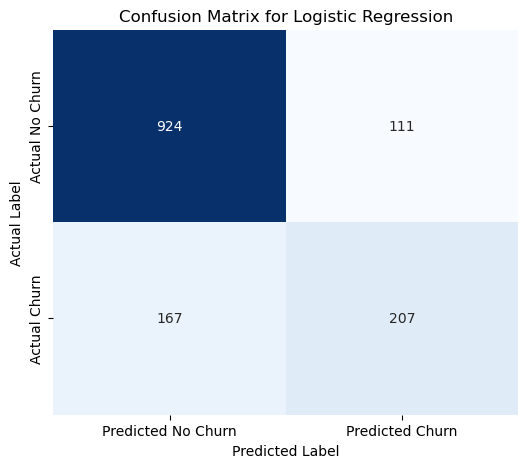

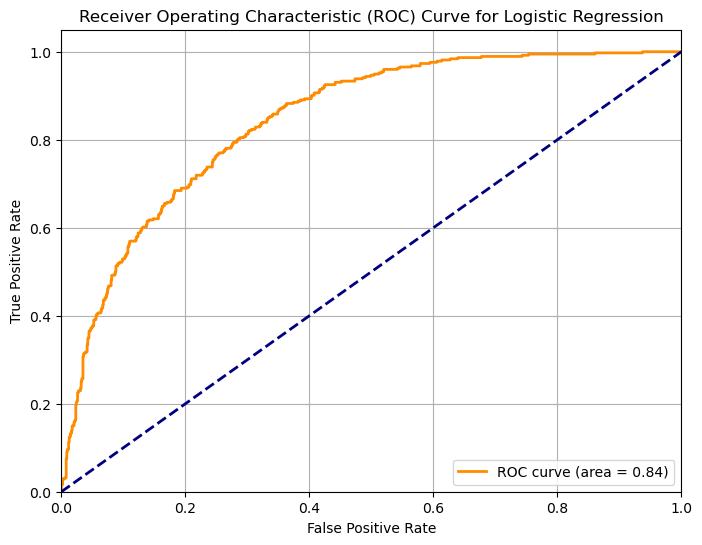


--- Performance Metrics for Random Forest Classifier on Test Set ---
Accuracy: 0.7857
Precision: 0.6224
Recall: 0.4893
F1-Score: 0.5479
ROC-AUC: 0.8222

Confusion Matrix:
[[924 111]
 [191 183]]


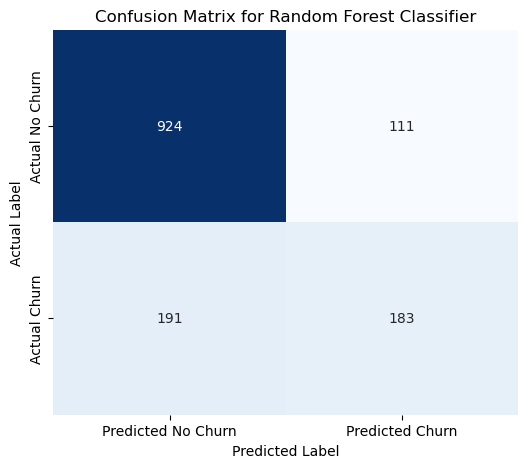

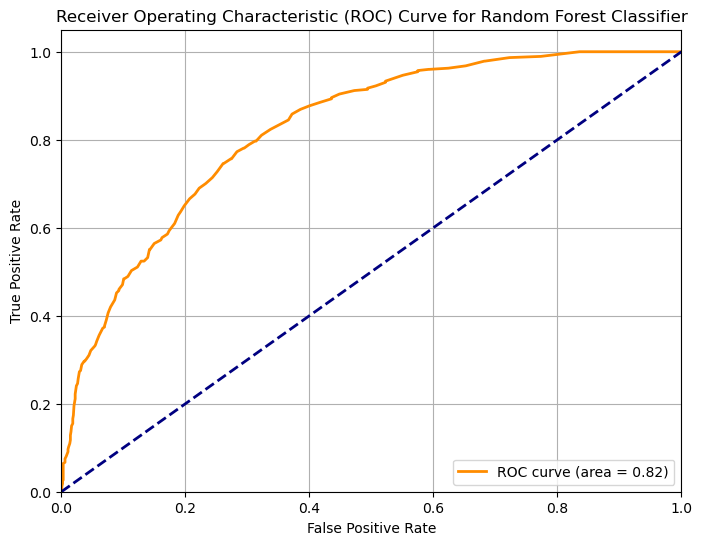


--- Performance Metrics for XGBoost Classifier on Test Set ---
Accuracy: 0.7913
Precision: 0.6316
Recall: 0.5134
F1-Score: 0.5664
ROC-AUC: 0.8337

Confusion Matrix:
[[923 112]
 [182 192]]


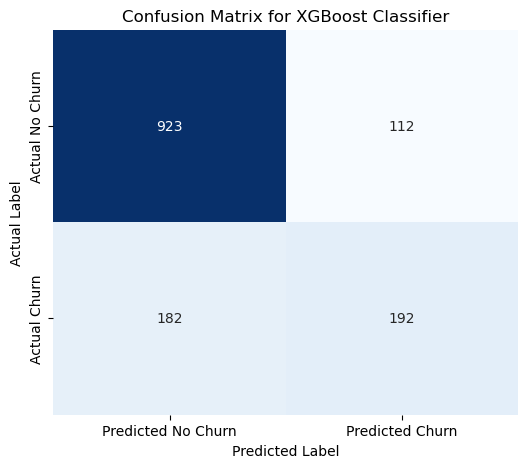

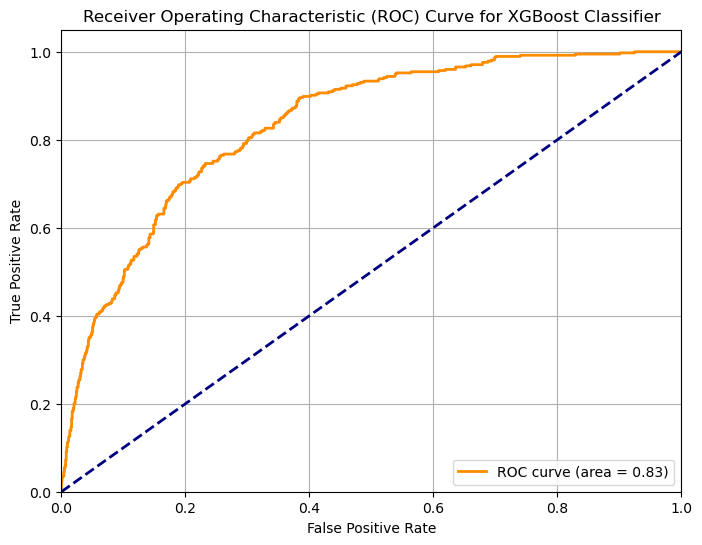


--- Comparative Summary of Model Performance on Test Set ---
                          Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                                   
Logistic Regression         0.8027     0.6509  0.5535    0.5983   0.8429
Random Forest Classifier    0.7857     0.6224  0.4893    0.5479   0.8222
XGBoost Classifier          0.7913     0.6316  0.5134    0.5664   0.8337

Top 10 Feature Importances (XGBoost Classifier):
cat__Contract_Month-to-month        0.412837
cat__InternetService_Fiber optic    0.239579
cat__StreamingMovies_Yes            0.036620
cat__OnlineSecurity_No              0.027820
cat__InternetService_No             0.025147
cat__TechSupport_No                 0.019185
cat__Contract_Two year              0.016740
cat__Contract_One year              0.016139
cat__PhoneService_No                0.014445
cat__StreamingTV_Yes                0.013942
dtype: float32


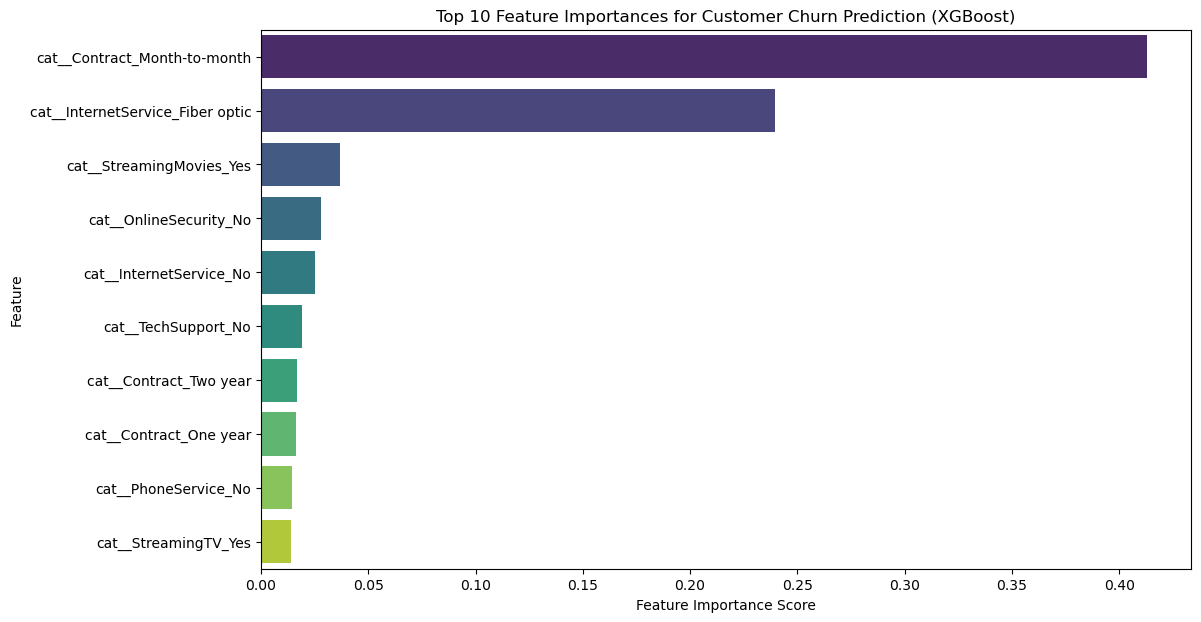


Top 10 Absolute Feature Coefficients (Logistic Regression):
num__tenure                        -1.292166
cat__Contract_Two year             -0.880902
cat__Contract_Month-to-month        0.645811
num__TotalCharges                   0.574879
cat__InternetService_DSL           -0.571450
cat__InternetService_Fiber optic    0.485420
cat__MultipleLines_No              -0.330282
cat__PaperlessBilling_No           -0.327002
cat__PhoneService_Yes              -0.285980
cat__Dependents_Yes                -0.278241
dtype: float64


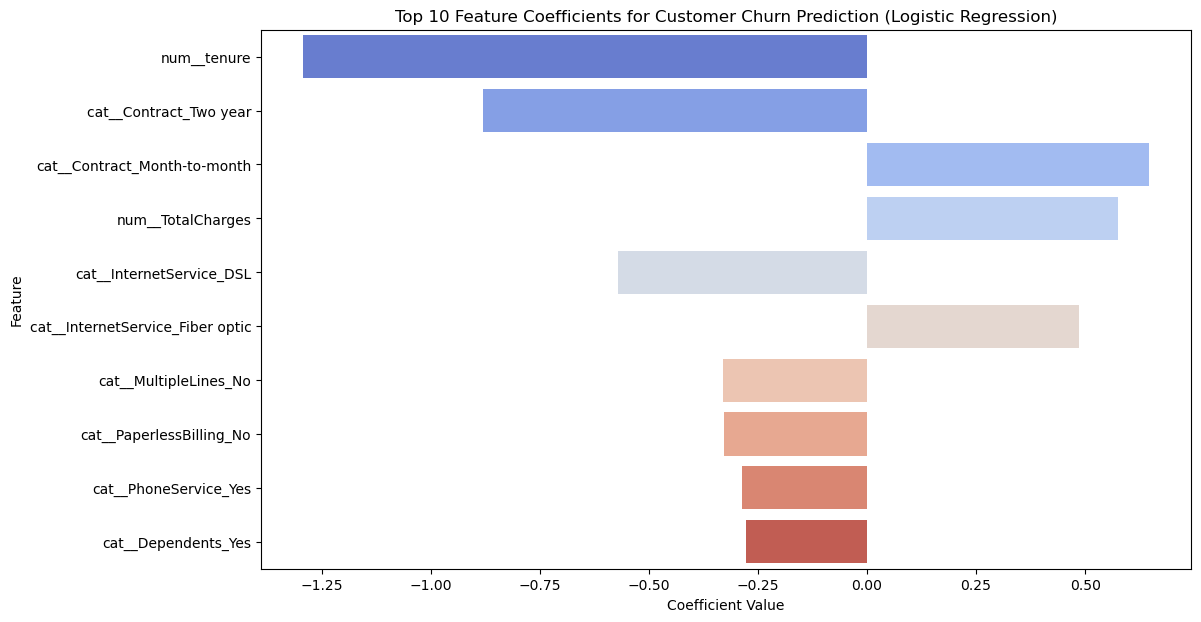


Top 10 Feature Importances (Random Forest Classifier):
num__TotalCharges                      0.157322
num__tenure                            0.136007
num__MonthlyCharges                    0.135147
cat__Contract_Month-to-month           0.050309
cat__OnlineSecurity_No                 0.033330
cat__PaymentMethod_Electronic check    0.030406
cat__InternetService_Fiber optic       0.028014
cat__TechSupport_No                    0.023540
cat__Contract_Two year                 0.021041
cat__OnlineBackup_No                   0.019170
dtype: float64


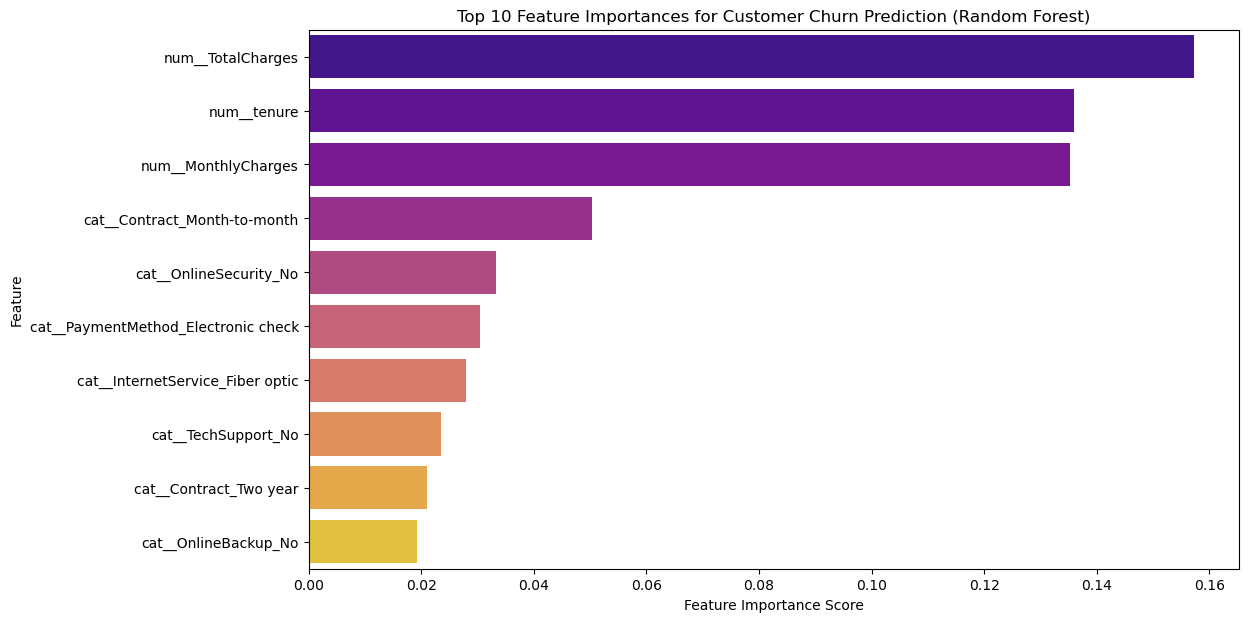

In [138]:
# Importation of necessary modules for model evaluation metrics and plotting functionalities.
# These are our tools for checking model performance and making graphs.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
# These are specific functions from scikit-learn that calculate our evaluation scores.
import matplotlib.pyplot as plt # For drawing graphs (like bar charts, line plots).
import seaborn as sns # Makes my graphs look nicer and provides more chart types.
import numpy as np # For general numerical operations, especially with arrays.
import pandas as pd # For working with data tables (DataFrames) and series.

# It is presupposed that 'model_logreg', 'model_rf_churn', 'model_xgb_churn' objects,
# alongside `X_test_churn`, `y_test_churn`, and `X_train_churn` datasets, are accessible
# from the "Model Development" section.
# This comment reminds us that I need the trained models and the test data from the previous step.

# --- Helper Function for Model Evaluation ---
# This is a reusable mini-program to evaluate ANY classification model. It saves me from writing the same code three times.
def evaluate_classification_model(model, X_test_data, y_test_data, model_name="Model"):
    """
    Evaluates a given classification model and prints common classification metrics.

    Args:
        model: The trained machine learning classification model we want to check (e.g., model_logreg).
        X_test_data (pd.DataFrame or np.array): The "clues" (features) from the test set.
        y_test_data (pd.Series or np.array): The *actual* "answers" (churn or no churn) for the test set.
        model_name (str): A simple name for the model (e.g., "Logistic Regression") for printing.
    """
    print(f"\n--- Performance Metrics for {model_name} on Test Set ---") # A heading for the results of this model.

    # 1. Prediction Generation
    # What I am doing: Asking the model to make predictions on the unseen test data.
    y_pred = model.predict(X_test_data) # This gets the model's final "Yes" (1) or "No" (0) prediction for each customer.
    # Example: If a model predicts a customer will churn, y_pred for that customer would be 1.
    y_proba = model.predict_proba(X_test_data)[:, 1] # This gets the model's *confidence score* (probability) that a customer will churn.
    # I take '[:, 1]' because it gives me the probability of the *positive class* (which is '1' for churn in our case).
    # Example: y_proba for a customer might be 0.85 (85% confident they'll churn) or 0.12 (12% confident they'll churn).

    # 2. Metric Calculation
    # What I am doing: Calculating all my different evaluation scores using the actual answers and the model's predictions.
    accuracy = accuracy_score(y_test_data, y_pred) # Calculates how many predictions (0s or 1s) were exactly right out of all predictions.
    precision = precision_score(y_test_data, y_pred) # Calculates: (True Positives) / (True Positives + False Positives). How many of the *predicted* churners were *actual* churners?
    recall = recall_score(y_test_data, y_pred) # Calculates: (True Positives) / (True Positives + False Negatives). How many of the *actual* churners did the model correctly *find*?
    f1 = f1_score(y_test_data, y_pred) # Calculates the F1-Score, which is a balance between precision and recall.
    roc_auc = roc_auc_score(y_test_data, y_proba) # Calculates the Area Under the Receiver Operating Characteristic Curve. A great overall measure of how well the model separates churners from non-churners based on its probability scores.

    print(f"Accuracy: {accuracy:.4f}") # Prints the accuracy, rounded to 4 decimal places.
    print(f"Precision: {precision:.4f}") # Prints precision.
    print(f"Recall: {recall:.4f}")     # Prints recall.
    print(f"F1-Score: {f1:.4f}")       # Prints F1-Score.
    print(f"ROC-AUC: {roc_auc:.4f}")   # Prints ROC-AUC.

    # Confusion Matrix (The "Who Got What Right/Wrong" Table)
    # What I am doing: Creating and displaying a table that shows correct and incorrect predictions.
    cm = confusion_matrix(y_test_data, y_pred) # This function creates the confusion matrix.
    # It counts:
    # - True Negatives (Top-Left): Actual Non-Churners correctly predicted as Non-Churners.
    # - False Positives (Top-Right): Actual Non-Churners incorrectly predicted as Churners (False Alarms).
    # - False Negatives (Bottom-Left): Actual Churners incorrectly predicted as Non-Churners (Missed Churners).
    # - True Positives (Bottom-Right): Actual Churners correctly predicted as Churners.
    print("\nConfusion Matrix:")
    print(cm) # Prints the raw confusion matrix numbers.
    plt.figure(figsize=(6, 5)) # Sets up a drawing space (a figure) for our plot, with a specific size.
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted No Churn', 'Predicted Churn'], # Labels for the horizontal axis of the heatmap.
                yticklabels=['Actual No Churn', 'Actual Churn'])       # Labels for the vertical axis of the heatmap.
    # sns.heatmap(): This creates a visual heatmap of the confusion matrix.
    # - `cm`: The confusion matrix data.
    # - `annot=True`: Displays the numbers inside each cell of the heatmap.
    # - `fmt='d'`: Formats the numbers as integers.
    # - `cmap='Blues'`: Uses a blue color scheme, where darker blue means higher numbers.
    # - `cbar=False`: Hides the color bar on the side.
    plt.title(f'Confusion Matrix for {model_name}') # Sets the title of the heatmap plot.
    plt.ylabel('Actual Label') # Labels the vertical axis.
    plt.xlabel('Predicted Label') # Labels the horizontal axis.
    plt.show() # Displays the generated heatmap.

    # ROC Curve (The "How Good Are You At Telling Them Apart?" Graph)
    # What I am doing: Drawing a curve that shows the trade-off between finding actual churners and incorrectly flagging non-churners.
    fpr, tpr, thresholds = roc_curve(y_test_data, y_proba) # Calculates the False Positive Rates (FPR) and True Positive Rates (TPR) needed to plot the ROC curve.
    # FPR: (False Positives) / (Total Actual Negatives) - How many non-churners did I wrongly flag?
    # TPR: (True Positives) / (Total Actual Positives) - How many actual churners did I correctly find? (This is Recall!)
    plt.figure(figsize=(8, 6)) # Sets up a drawing space for the ROC curve plot.
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    # This plots the actual ROC curve. `lw=2` sets line width, `label` provides information for the legend.
    # The `area = {roc_auc:.2f}` part dynamically adds the ROC-AUC score to the legend.
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Plots a diagonal dashed line.
    # This diagonal line represents a random classifier (like flipping a coin). A good model's curve should be far above this line.
    plt.xlim([0.0, 1.0]) # Sets the range for the x-axis from 0 to 1.
    plt.ylim([0.0, 1.05]) # Sets the range for the y-axis from 0 to 1.05.
    plt.xlabel('False Positive Rate') # Labels the x-axis.
    plt.ylabel('True Positive Rate') # Labels the y-axis.
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}') # Sets the title of the plot.
    plt.legend(loc="lower right") # Displays the legend (the label for the curve) in the bottom right.
    plt.grid(True) # Adds a grid to the plot for easier reading.
    plt.show() # Displays the generated ROC curve plot.

    # This function returns a dictionary containing all the calculated metrics and predictions.
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision,
            'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc, 'y_pred': y_pred, 'y_proba': y_proba}

# --- 1. Evaluate All Trained Models ---
# What we're doing: Running our evaluation helper function for each of our three models and collecting their results.
evaluation_results_churn = [] # An empty list to store the results from each model.

# Evaluate Logistic Regression Model
logreg_results = evaluate_classification_model(model_logreg, X_test_churn, y_test_churn, "Logistic Regression")
evaluation_results_churn.append(logreg_results) # Add Logistic Regression's results to our list.

# Evaluate Random Forest Classifier Model
rf_churn_results = evaluate_classification_model(model_rf_churn, X_test_churn, y_test_churn, "Random Forest Classifier")
evaluation_results_churn.append(rf_churn_results) # Add Random Forest's results.

# Evaluate XGBoost Classifier Model
xgb_churn_results = evaluate_classification_model(model_xgb_churn, X_test_churn, y_test_churn, "XGBoost Classifier")
evaluation_results_churn.append(xgb_churn_results) # Add XGBoost's results.

# --- 2. Comparative Summary of Model Performance ---
# What I am doing: Creating a neat table to easily compare all the models' scores side-by-side.
print("\n--- Comparative Summary of Model Performance on Test Set ---")
metrics_df_churn = pd.DataFrame(evaluation_results_churn).set_index('Model')
# pd.DataFrame(evaluation_results_churn): Converts our list of result dictionaries into a pandas DataFrame (a table).
# .set_index('Model'): Sets the 'Model' name (e.g., "Logistic Regression") as the row labels in the table.
print(metrics_df_churn[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].round(4))
# Prints only the specified important metrics (Accuracy, Precision, Recall, F1-Score, ROC-AUC) and rounds them to 4 decimal places.
# This gives you a clear overview of which model performed best across different aspects.

# --- 3. Feature Importance Analysis ---
# What I am doing: Figuring out which "clues" (features) were most important for each model's predictions.

# Feature importance for XGBoost Classifier
# Tree-based models (XGBoost, Random Forest) have a built-in way to tell you feature importance.
if hasattr(model_xgb_churn, 'feature_importances_'): # Checks if the `model_xgb_churn` object has a `feature_importances_` attribute.
    feature_importances_xgb_churn = pd.Series(model_xgb_churn.feature_importances_, index=X_train_churn.columns)
    # Creates a pandas Series where the index is the feature names and values are their importance scores.
    sorted_importances_xgb_churn = feature_importances_xgb_churn.sort_values(ascending=False)
    # Sorts the features from most important to least important.
    print("\nTop 10 Feature Importances (XGBoost Classifier):")
    print(sorted_importances_xgb_churn.head(10)) # Prints the top 10 most important features and their scores.

    plt.figure(figsize=(12, 7)) # Sets up a figure for the bar plot.
    sns.barplot(x=sorted_importances_xgb_churn.head(10).values,
                y=sorted_importances_xgb_churn.head(10).index, palette='viridis')
    # Creates a horizontal bar plot showing the top 10 features and their importance scores.
    # `palette='viridis'` sets a nice color scheme.
    plt.title('Top 10 Feature Importances for Customer Churn Prediction (XGBoost)') # Sets the plot title.
    plt.xlabel('Feature Importance Score') # Labels the x-axis.
    plt.ylabel('Feature') # Labels the y-axis.
    plt.show() # Displays the plot.

# Feature coefficients for Logistic Regression
# For linear models like Logistic Regression, coefficients show feature importance and direction of impact.
if hasattr(model_logreg, 'coef_'): # Checks if `model_logreg` has a `coef_` attribute (coefficients).
    # For binary classification, coef_ is usually a 2D array (1, n_features). We take the first row [0].
    feature_coefficients_logreg = pd.Series(model_logreg.coef_[0], index=X_train_churn.columns)
    # Creates a pandas Series with feature names and their coefficients.
    # A positive coefficient means that feature increases the likelihood of churn.
    # A negative coefficient means that feature decreases the likelihood of churn.
    # The magnitude (absolute value) of the coefficient shows how strong the impact is.
    sorted_coefficients_logreg = feature_coefficients_logreg.abs().sort_values(ascending=False)
    # Sorts features by the absolute value of their coefficients (strongest impact, regardless of direction).
    print("\nTop 10 Absolute Feature Coefficients (Logistic Regression):")
    print(feature_coefficients_logreg.loc[sorted_coefficients_logreg.head(10).index]) # Prints the top 10 features and their original (signed) coefficients.

    plt.figure(figsize=(12, 7)) # Sets up a figure for the bar plot.
    sns.barplot(x=feature_coefficients_logreg.loc[sorted_coefficients_logreg.head(10).index].values,
                y=feature_coefficients_logreg.loc[sorted_coefficients_logreg.head(10).index].index, palette='coolwarm')
    # Creates a horizontal bar plot. `palette='coolwarm'` is good for showing positive/negative values.
    plt.title('Top 10 Feature Coefficients for Customer Churn Prediction (Logistic Regression)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

# Feature importance for Random Forest Classifier
# Similar to XGBoost, Random Forest also provides feature importances.
if hasattr(model_rf_churn, 'feature_importances_'): # Checks for the `feature_importances_` attribute.
    feature_importances_rf_churn = pd.Series(model_rf_churn.feature_importances_, index=X_train_churn.columns)
    sorted_importances_rf_churn = feature_importances_rf_churn.sort_values(ascending=False)
    print("\nTop 10 Feature Importances (Random Forest Classifier):")
    print(sorted_importances_rf_churn.head(10))

    plt.figure(figsize=(12, 7))
    sns.barplot(x=sorted_importances_rf_churn.head(10).values,
                y=sorted_importances_rf_churn.head(10).index, palette='plasma') # Uses a different palette for variety.
    plt.title('Top 10 Feature Importances for Customer Churn Prediction (Random Forest)')
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Feature')
    plt.show()


# Video Link

https://drive.google.com/file/d/1Q2_zrfPTpX1UCG8mOmngZ4-mp1BiUk4R/view?usp=drivesdk